In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import os
print(os.listdir("./input"))

['athlete_events.csv', 'noc_regions.csv']


In [116]:
data = pd.read_csv('./input/athlete_events.csv')
regions = pd.read_csv('./input/noc_regions.csv')

In [117]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [118]:
merged = pd.merge(data, regions, on='NOC', how='left')

In [119]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [164]:
judo = merged[(merged.Sport == 'Judo')]
judoGold = judo[(judo.Medal == 'Gold')]
judoSilver = judo[(judo.Medal == 'Silver')]
judoBronze = judo[(judo.Medal == 'Bronze')]
judoMedals = judo[judo.Medal.notnull()]

judoM = judo[(judo.Sex == 'M')]
judoF = judo[(judo.Sex == 'F')]

judoM73 = judoM[judoM.Weight == 73]
judoM81 = judoM[judoM.Weight == 81]

judoMSortedH = judoM.sort_values(['Height'])
judoMSortedH = judoMSortedH[judoMSortedH.Height.notnull()]
judoFSortedH = judoF.sort_values(['Height'])
judoFSortedH = judoFSortedH[judoFSortedH.Height.notnull()]

judoMSortedW = judoM.sort_values(['Weight'])
judoMSortedW = judoMSortedW[judoMSortedW.Weight.notnull()]
judoFSortedW = judoF.sort_values(['Weight'])
judoFSortedW = judoFSortedW[judoFSortedW.Weight.notnull()]



judoModernEra = judo[(judo.Year >= 1998)]



judoTotalMedalsCountry = judo[judo.Medal.notnull()]
judoTotalMedals1998 = judoTotalMedalsCountry[judoTotalMedalsCountry.Year >= 1998]
judoTotalMedals1998 = judoTotalMedals1998.Team.value_counts().reset_index()
judoTotalMedals1998 = judoTotalMedals1998.head(5)
judoTotalMedals1998 = judoTotalMedals1998.rename(index=str, columns={"index":"Team", "Team" : "Medals"})

judoTotalMedalsCountryPlot = judoTotalMedalsCountry.Team.value_counts().reset_index()



judoTotalMedalsCountryPlot = judoTotalMedalsCountryPlot.head(5)
judoTotalMedalsCountryPlot = judoTotalMedalsCountryPlot.rename(index=str, columns={"index":"Team", "Team" : "Medals"})


judoMostGoldF = judo[(judo.Medal == 'Gold')]
judoMostGoldF = judoMostGoldF[(judoMostGoldF.Sex == 'F')]
judoMostGoldF = judoMostGoldF.Name.value_counts().reset_index()
judoMostGoldF = judoMostGoldF.rename(columns={"index":"Name", "Name" : "Number of Golds"})

judoTN = judo[(judo.Name == 'Tadahiro Nomura')]



judoTotalMedals = judoMedals.Name.value_counts().reset_index()

judoRTT = judo[(judo.Name == 'Ryoko Tamura-Tani')]
judoAP = judo[(judo.Name == 'Angelo Parisi')]


judoAge = judo[judo.Age.notnull()]
judoAge = judoAge.sort_values(['Age'])

In [165]:
judoAge.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
46169,23829,Ludmila Cristea,F,14.0,165.0,55.0,Moldova,MDA,2000 Summer,2000,Summer,Sydney,Judo,Judo Women's Lightweight,NaN,Moldova,NaN


In [166]:
judoAge.tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
145940,73239,Orlando Madrigal Valverde,M,43.0,163.0,78.0,Costa Rica,CRC,1964 Summer,1964,Summer,Tokyo,Judo,Judo Men's Middleweight,NaN,Costa Rica,NaN


In [161]:
judoAP.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
181913,91430,Angelo Parisi,M,19.0,185.0,110.0,Great Britain,GBR,1972 Summer,1972,Summer,Munich,Judo,Judo Men's Open Class,Bronze,UK,NaN
181914,91430,Angelo Parisi,M,27.0,185.0,110.0,France,FRA,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Heavyweight,Gold,France,NaN
181915,91430,Angelo Parisi,M,27.0,185.0,110.0,France,FRA,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Open Class,Silver,France,NaN
181916,91430,Angelo Parisi,M,31.0,185.0,110.0,France,FRA,1984 Summer,1984,Summer,Los Angeles,Judo,Judo Men's Heavyweight,Silver,France,NaN


In [159]:
judoRTT.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
235835,118250,Ryoko Tamura-Tani,F,16.0,146.0,48.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Judo,Judo Women's Extra-Lightweight,Silver,Japan,NaN
235836,118250,Ryoko Tamura-Tani,F,20.0,146.0,48.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Extra-Lightweight,Silver,Japan,NaN
235837,118250,Ryoko Tamura-Tani,F,25.0,146.0,48.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Judo,Judo Women's Extra-Lightweight,Gold,Japan,NaN
235838,118250,Ryoko Tamura-Tani,F,28.0,146.0,48.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Judo,Judo Women's Extra-Lightweight,Gold,Japan,NaN
235839,118250,Ryoko Tamura-Tani,F,32.0,146.0,48.0,Japan,JPN,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Extra-Lightweight,Bronze,Japan,NaN


In [152]:
judoTotalMedals.head(5)

,index,Name
0,Ryoko Tamura-Tani,5
1,Driulys Gonzlez Morales,4
2,Angelo Parisi,4
3,Edith Bosch,3
4,Idalys Ortz Bocourt,3


In [154]:
judoMostGoldF.head(10)

,Name,Number of Golds
0,Ayumi Tanimoto,2
1,Xian Dongmei,2
2,Kayla Harrison,2
3,Ryoko Tamura-Tani,2
4,Masae Ueno,2
5,Paula Beln Pareto,1
6,Jo Min-Seon,1
7,Odalis Rev Jimnez,1
8,Catherine Dominique Marie-Christine Fleury-Vachon,1
9,Almudena Muoz Martnez,1


In [151]:
judoTN.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
172760,86802,Tadahiro Nomura,M,21.0,164.0,60.0,Japan,JPN,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Extra-Lightweight,Gold,Japan,NaN
172761,86802,Tadahiro Nomura,M,25.0,164.0,60.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Judo,Judo Men's Extra-Lightweight,Gold,Japan,NaN
172762,86802,Tadahiro Nomura,M,29.0,164.0,60.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Extra-Lightweight,Gold,Japan,NaN


In [122]:
judoMSortedH.tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1635,906,Peter Adelaar,M,33.0,213.0,135.0,Netherlands,NED,1980 Summer,1980,Summer,Moskva,Judo,Judo Men's Open Class,NaN,Netherlands,NaN


In [123]:
judoFSortedH.tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
207555,104150,Urszula Sadkowska,F,24.0,193.0,145.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Judo,Judo Women's Heavyweight,NaN,Poland,NaN


In [124]:
judoMSortedW.tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN,Guam,NaN


In [125]:
judoFSortedW.tail(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
196341,98570,Samah Ramadan Mohamed,F,26.0,186.0,163.0,Egypt,EGY,2004 Summer,2004,Summer,Athina,Judo,Judo Women's Heavyweight,NaN,Egypt,NaN


In [126]:
judoM['Height'].mean()

177.4875

In [127]:
judoM['Weight'].mean()

83.57394510446538

In [128]:
judoF['Height'].mean()

166.267

In [129]:
judoF['Weight'].mean()

67.06716417910448

In [130]:
judoModernEra.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
412,229,Mohamed Ali Abdelaal,M,26.0,175.0,81.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Half-Middleweight,NaN,Egypt,NaN
435,242,Ahmed Abdelrahman,M,20.0,165.0,60.0,Egypt,EGY,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Extra-Lightweight,NaN,Egypt,NaN
614,355,Mukhamadmurod Abdurakhmonov,M,29.0,192.0,117.0,Tajikistan,TJK,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Heavyweight,NaN,Tajikistan,NaN
701,400,Yaritza Abel Rojas,F,28.0,NaN,62.0,Cuba,CUB,2012 Summer,2012,Summer,London,Judo,Judo Women's Half-Middleweight,NaN,Cuba,NaN


Text(0.5,1,'Age of Olympic Judoka')

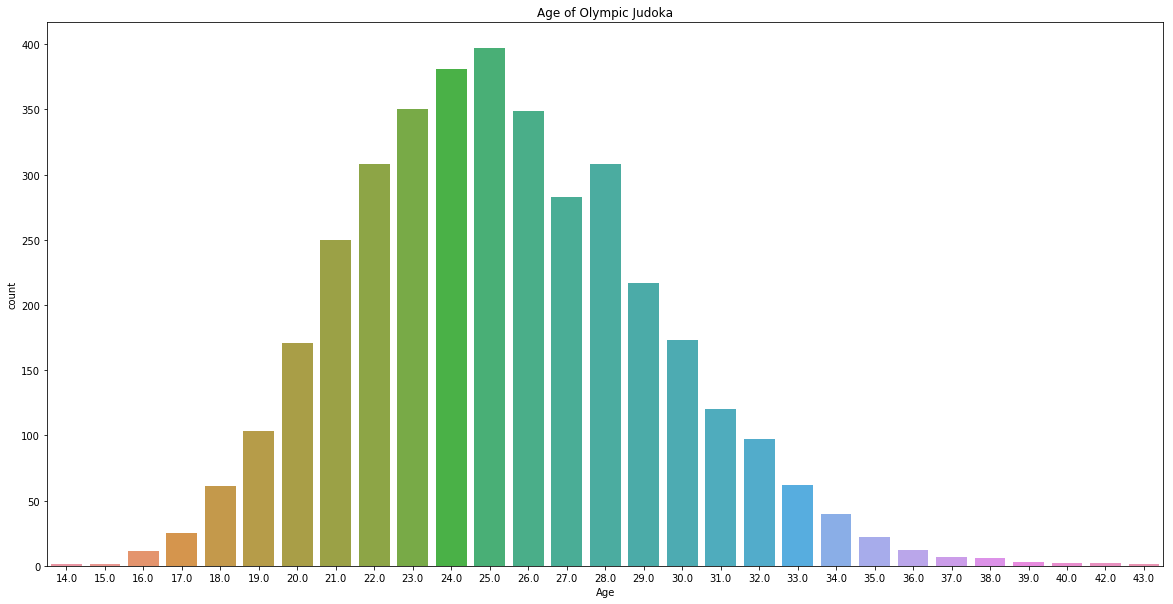

In [131]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(judo['Age'])
plt.title('Age of Olympic Judoka')

Text(0.5,1,'Age of Olympic Judoka Medalists')

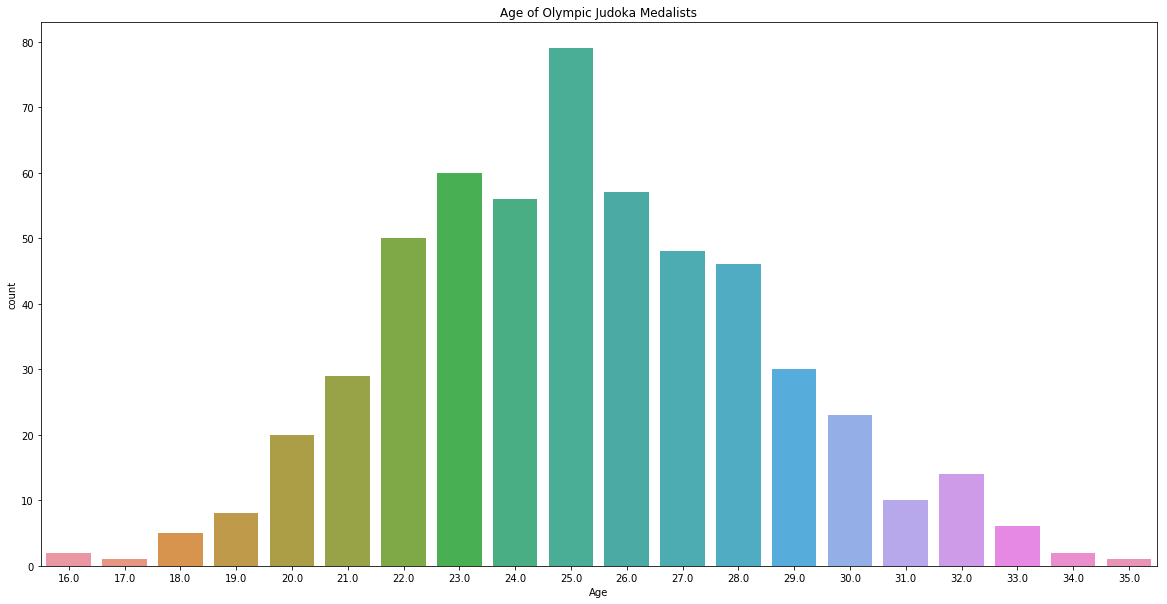

In [132]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(judoMedals['Age'])
plt.title('Age of Olympic Judoka Medalists')

Text(0.5,1,'Total Judo Medals by Country')

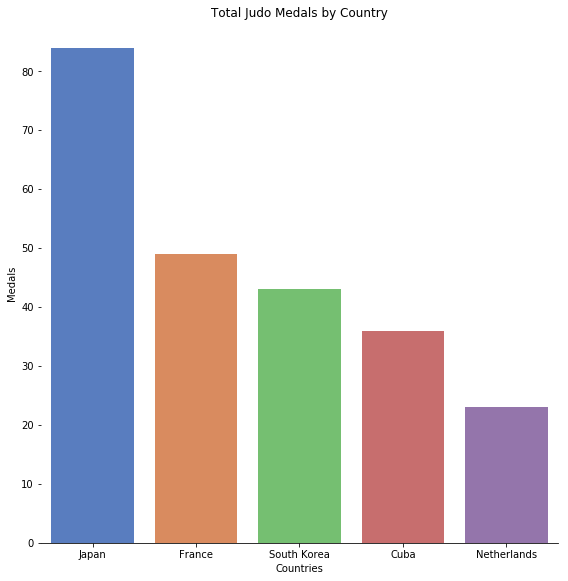

In [133]:
g = sns.catplot(x='Team', y="Medals", data=judoTotalMedalsCountryPlot, height=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Countries")
g.set_ylabels("Medals")
plt.title('Total Judo Medals by Country')

Text(0.5,1,'Total Judo Medals by Country Since 1998')

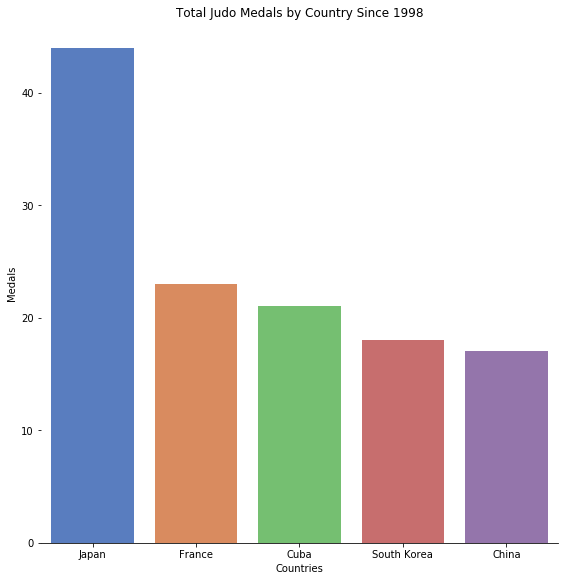

In [134]:
g = sns.catplot(x='Team', y="Medals", data=judoTotalMedals1998, height=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Countries")
g.set_ylabels("Medals")
plt.title('Total Judo Medals by Country Since 1998')